# keras中的数据增强

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### 1. 定义文件夹目录

In [2]:
base_dir = "dataset\\dog_and_cat"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "test")

### 2. 使用图像增强，用以下方法

    train_datagen = ImageDataGenerator(
      rotation_range,
      width_shift_range,
      height_shift_range,
      shear_range,
      zoom_range,
      horizontal_flip,
      fill_mode)

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures. 
 图片随机转动的角度（0-180）
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
 图片宽度和高度的某个比例，数据增强时图片随机水平或者竖直偏移的幅度
* shear_range is for randomly applying shearing transformations.
 裁剪强度
* zoom_range is for randomly zooming inside pictures.
 随机缩放，相当于[lower,upper] = [1 - zoom_range, 1+zoom_range]
* horizontal_flip is for randomly flipping half of the images horizontally.
 随机的对图片进行水平翻转（vertical_flip --> 进行随机竖直翻转）
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
 'constant'，‘nearest’，‘reflect’或‘wrap’之一，当进行变换时超出边界的点将根据本参数给定的方法进行处理

In [3]:
train_data_gen_aug = ImageDataGenerator(rescale = 1./255,
                                        rotation_range = 40,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip = True,
                                        vertical_flip =  True)
validation_data_gen_aug = ImageDataGenerator(rescale = 1./255)

In [4]:
train_generator_aug = train_data_gen_aug.flow_from_directory(train_dir,
                                                     batch_size = 40, #2000个数据,训练50steps
                                                     class_mode = 'binary',
                                                     target_size=(150, 150))

validation_generator_aug = validation_data_gen_aug.flow_from_directory(validation_dir,
                                                               batch_size = 40,#1000个数据,测试25steps
                                                               class_mode = 'binary',
                                                               target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 3. 构建模型训练

In [5]:
model = keras.Sequential([
    # Conv1
    keras.layers.Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    # Conv2
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    # Conv3
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    # Conv4
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    # Dense
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 146, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 69, 69, 128)       5

In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [7]:
train = model.fit_generator(train_generator_aug,
                            validation_data= validation_generator_aug,
                            steps_per_epoch = 50,
                            validation_steps= 25,
                            epochs = 50,
                            verbose = 1)#日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录

Epoch 1/50
50/50 [==============================] - 42s 849ms/step - loss: 0.7921 - accuracy: 0.5180 - val_loss: 0.6940 - val_accuracy: 0.5200
Epoch 2/50
50/50 [==============================] - 36s 721ms/step - loss: 0.6842 - accuracy: 0.5865 - val_loss: 1.0668 - val_accuracy: 0.5000
Epoch 3/50
50/50 [==============================] - 36s 722ms/step - loss: 0.6613 - accuracy: 0.6140 - val_loss: 2.0508 - val_accuracy: 0.4970
Epoch 4/50
50/50 [==============================] - 35s 697ms/step - loss: 0.6555 - accuracy: 0.6245 - val_loss: 1.0237 - val_accuracy: 0.5000
Epoch 5/50
50/50 [==============================] - 34s 689ms/step - loss: 0.6580 - accuracy: 0.6335 - val_loss: 1.2536 - val_accuracy: 0.5260
Epoch 6/50
50/50 [==============================] - 34s 690ms/step - loss: 0.6543 - accuracy: 0.6550 - val_loss: 0.9556 - val_accuracy: 0.5130
Epoch 7/50
50/50 [==============================] - 34s 688ms/step - loss: 0.6309 - accuracy: 0.6690 - val_loss: 0.7259 - val_accuracy: 0.5290

### 4. 可视化训练过程

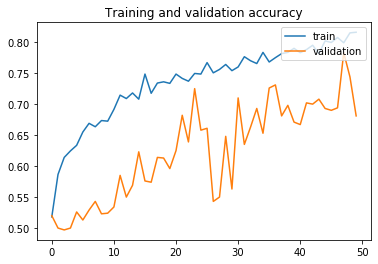

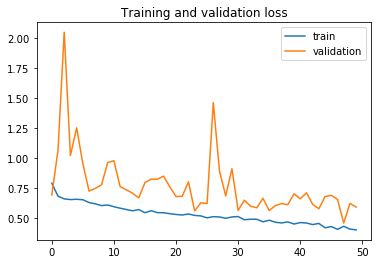

In [8]:
acc      = train.history[     'accuracy' ]
val_acc  = train.history[ 'val_accuracy' ]#validation accuracy
loss     = train.history[    'loss' ]
val_loss = train.history['val_loss' ] #validation loss


plt.plot  ( train.epoch,     acc )
plt.plot  ( train.epoch, val_acc )
plt.title ('Training and validation accuracy')
plt.legend(['train', 'validation'], loc='upper right')
plt.figure()

plt.plot  ( train.epoch,     loss )
plt.plot  ( train.epoch, val_loss )
plt.title ('Training and validation loss')
plt.legend(['train', 'validation'], loc='upper right')